In [1]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

# Load your dataset from a file (replace 'your_dataset.csv' with your actual file name)
file_path = '/content/drive/MyDrive/miniprojectfin.csv'
df = pd.read_csv(file_path)

# Assuming 'target' is the name of the column containing your class label
X = df.drop('Product_Store_Sales_Total', axis=1)  # Features
y = df['Product_Store_Sales_Total']  # Target variable

# Initializing RandomOverSampler
random_oversampler = RandomOverSampler(random_state=42)

# Balancing the dataset using RandomOverSampler
X_resampled, y_resampled = random_oversampler.fit_resample(X, y)

# Combining the resampled features and target into a new DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='target')], axis=1)

# Save the resampled dataset to a new file (replace 'resampled_dataset.csv' with your desired file name)
df_resampled.to_csv('rosresampled_dataset.csv', index=False)


In [ ]:
data=pd.read_csv("/content/rosresampled_dataset.csv")

In [ ]:
data.isnull().sum()

Product_Id                    0
Product_Weight                0
Product_Sugar_Content         0
Product_Allocated_Area      349
Product_Type                  0
Product_MRP                   0
Store_Id                      0
Store_Establishment_Year      0
Store_Size                    0
Store_Location_City_Type      0
Store_Type                    0
target                        0
dtype: int64

In [ ]:
data['Product_Allocated_Area']=data['Product_Allocated_Area'].ffill()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Product_Id'] = le.fit_transform(data['Product_Id'])
data['Product_Sugar_Content'] = le.fit_transform(data['Product_Sugar_Content'])
data['Product_Type'] = le.fit_transform(data['Product_Type'])
data['Store_Id'] = le.fit_transform(data['Store_Id'])
data['Store_Size'] = le.fit_transform(data['Store_Size'])
data['Store_Location_City_Type'] = le.fit_transform(data['Store_Location_City_Type'])
data['Store_Type'] = le.fit_transform(data['Store_Type'])
data['target'] = le.fit_transform(data['target'])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [ ]:
X = data.iloc[:,0:11]
y = data['target']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

k = 5
knn = KNeighborsClassifier(n_neighbors=k)


knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:, 1]


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.9456695429849792
Confusion Matrix:
[[1070    0   12]
 [   4  944   50]
 [  52   52  945]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1082
           1       0.95      0.95      0.95       998
           2       0.94      0.90      0.92      1049

    accuracy                           0.95      3129
   macro avg       0.95      0.95      0.95      3129
weighted avg       0.95      0.95      0.95      3129



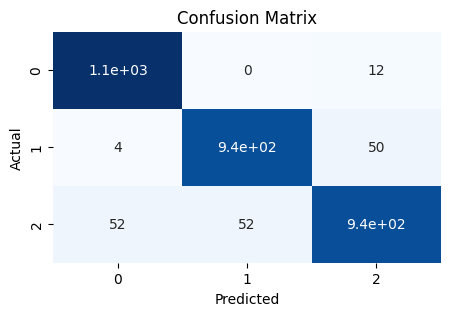

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix,annot=True,cmap='Blues',cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
report=classification_report(y_test,y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1082
           1       0.95      0.95      0.95       998
           2       0.94      0.90      0.92      1049

    accuracy                           0.95      3129
   macro avg       0.95      0.95      0.95      3129
weighted avg       0.95      0.95      0.95      3129

